In [2]:
import sys, os
from glob import glob
# sys.path.append("../scripts/")
# import generate_root_guillermo as gen
# from generate_root_guillermo import *

import pandas as pd
import uproot, hist
import awkward as ak
import matplotlib.pyplot as plt

In [4]:
import importlib
importlib.reload(gen)
# print(__name__)

importing


<module 'generate_root_guillermo' from '/home/guillermo/Documents/Github/UA_Research/DIALS-explore/notebooks/../scripts/generate_root_guillermo.py'>

Goal is to make the following plot for 1 me. Then we can make a script to expand for the rest.

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x74fcb020efd0>, cbar=<matplotlib.colorbar.Colorbar object at 0x74fcb0268690>, text=[])

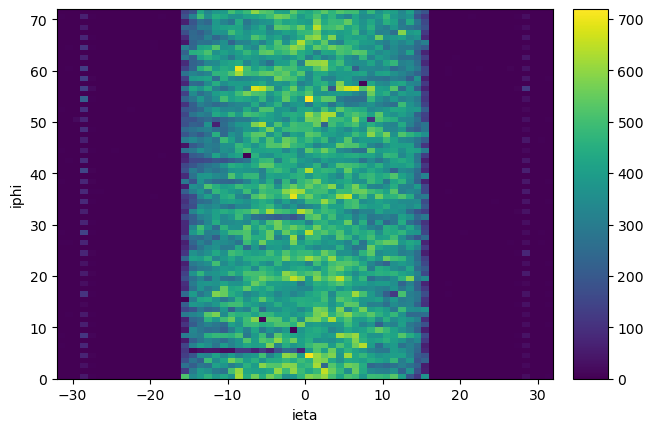

In [36]:
file = uproot.open("../files/Ls_ge_1k/Run383254/OccupancyCut/output.root")
h = file['Hcal4DQMAnalyzer/hist3D_depth1;1'].to_hist()
h[1,:,:].plot()

In [39]:
df[dfmask].shape[0]

1255

In [123]:
df = pd.read_parquet("../files/Ls_ge_1k/run-383_254.parquet")
df= df.convert_dtypes()

dfmask = df.me == 'Hcal/DigiTask/OccupancyCut/depth/depth1'

h = (
    hist.Hist.new
    .Reg(df[dfmask].shape[0], 0, df[dfmask].shape[0], name="ls")
    .Reg(72, 0, 72, name="iphi")
    .Reg(84, -32, 32, name="ieta")
    .Double()
)
# h
# h[...] = df[dfmask].data
# h
# h[1,:,:].T.plot()

In [141]:
df[dfmask].ls_number # this is the zeroth dim

0           1
8           2
16          3
24          4
32          5
         ... 
10000    1255
10008    1256
10016    1257
10024    1258
10032    1259
Name: ls_number, Length: 1255, dtype: Int64

In [205]:
df[dfmask].data

0        [[0.0, 0.0, 1.0, 1.0, 3.0, 2.0, 1.0, 4.0, 2.0,...
8        [[0.0, 0.0, 0.0, 4.0, 1.0, 2.0, 2.0, 6.0, 2.0,...
16       [[0.0, 0.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0,...
24       [[0.0, 0.0, 0.0, 2.0, 1.0, 3.0, 1.0, 0.0, 0.0,...
32       [[0.0, 0.0, 1.0, 4.0, 0.0, 2.0, 0.0, 2.0, 6.0,...
                               ...                        
10000    [[0.0, 0.0, 2184.0, 2167.0, 2178.0, 2190.0, 21...
10008    [[0.0, 0.0, 2242.0, 2224.0, 2229.0, 2252.0, 21...
10016    [[0.0, 0.0, 2185.0, 2193.0, 2180.0, 2196.0, 21...
10024    [[0.0, 0.0, 2177.0, 2164.0, 2170.0, 2183.0, 21...
10032    [[0.0, 0.0, 2063.0, 2045.0, 2048.0, 2061.0, 20...
Name: data, Length: 1255, dtype: object

In [112]:
df[dfmask & (df[dfmask].ls_number.diff() != 1)]

/tmp/ipykernel_7116/2229839580.py:1: FutureWarning: Operation between non boolean Series with different indexes will no longer return a boolean result in a future version. Cast both Series to object type to maintain the prior behavior.
  df[dfmask & (df[dfmask].ls_number.diff() != 1)]


,dataset,me,dataset_id,file_id,run_number,ls_number,me_id,x_min,x_max,x_bin,y_min,y_max,y_bin,entries,data
2968,/ZeroBias/Run2024F-PromptReco-v1/DQMIO,Hcal/DigiTask/OccupancyCut/depth/depth1,14986300,16932054037,383254,374,102,0,84,84,0.5,72.5,72,2892943,"[[0.0, 0.0, 1348.0, 1349.0, 1359.0, 1364.0, 13..."
6112,/ZeroBias/Run2024F-PromptReco-v1/DQMIO,Hcal/DigiTask/OccupancyCut/depth/depth1,14986300,16989892117,383254,768,102,0,84,84,0.5,72.5,72,3836223,"[[0.0, 0.0, 1798.0, 1777.0, 1775.0, 1784.0, 17..."
8968,/ZeroBias/Run2024F-PromptReco-v1/DQMIO,Hcal/DigiTask/OccupancyCut/depth/depth1,14986300,16932053957,383254,1126,102,0,84,84,0.5,72.5,72,2163,"[[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."


In [115]:
df[dfmask].ls_number.iloc[760:770]

6080    763
6088    764
6096    765
6104    766
6112    768
6120    769
6128    770
6136    771
6144    772
6152    773
Name: ls_number, dtype: Int64

<Axes: >

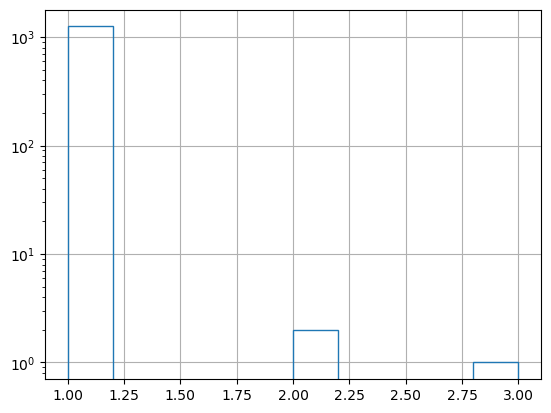

In [118]:
df[dfmask].ls_number.diff().hist(histtype='step',log=True)

In [222]:
array[arraymask].data[:,:,10:-10]

<Array [[[2, 1, 1, ..., 0, 1, 2], ...], ...] type='1255 * option[var * opti...'>

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x74fd0b1a4cd0>, cbar=<matplotlib.colorbar.Colorbar object at 0x74fd0b4b7750>, text=[])

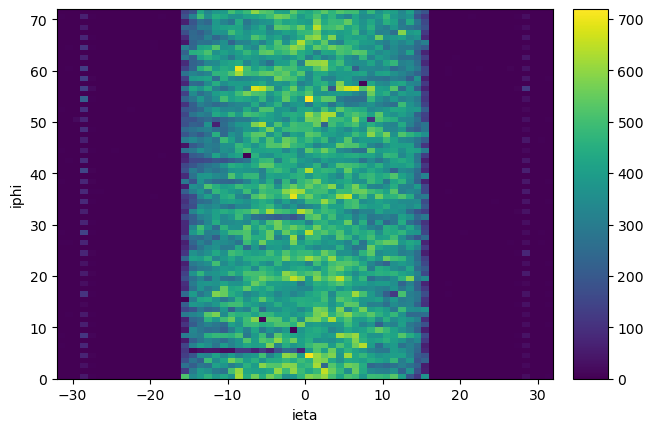

In [223]:
array = ak.from_parquet("../files/Ls_ge_1k/run-383_254.parquet")
me = 'Hcal/DigiTask/OccupancyCut/depth/depth1'
arraymask = (array.me == me)

h = (
    hist.Hist.new
    .Reg(len(array[arraymask]), 0, len(array[arraymask]), name="ls")
    .Reg(72, 0, 72, name="iphi")
    .Reg(64, -32, 32, name="ieta")
    .Double()
)
h
h[...] = array[arraymask].data[:,:,10:-10]
h
h[1,:,:].T.plot()

In [224]:
with uproot.recreate("temp.root") as file:
    file[me.replace('/',"_")] = h

In [5]:
with uproot.open("temp.root") as file:
    print(file['data'])

<TH3D (version 4) at 0x76325b787e00>
